# Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
from keras.utils.np_utils import to_categorical 
import numpy as np
import cv2 
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator


In [4]:
Path= '/content/gdrive/My Drive/Weather classification/'

In [5]:
#looking at names of images and number of images
dirs = os.listdir(Path)
print(dirs)
k = np.array(dirs)
k.shape

['sunrise123.jpg', 'sunrise124.jpg', 'sunrise125.jpg', 'sunrise126.jpg', 'sunrise127.jpg', 'sunrise128.jpg', 'sunrise129.jpg', 'sunrise130.jpg', 'sunrise131.jpg', 'sunrise132.jpg', 'sunrise133.jpg', 'sunrise134.jpg', 'sunrise135.jpg', 'sunrise136.jpg', 'sunrise137.jpg', 'sunrise138.jpg', 'sunrise139.jpg', 'sunrise140.jpg', 'sunrise141.jpg', 'sunrise142.jpg', 'sunrise143.jpg', 'sunrise144.jpg', 'sunrise145.jpg', 'sunrise146.jpg', 'sunrise147.jpg', 'sunrise148.jpg', 'sunrise149.jpg', 'sunrise150.jpg', 'sunrise151.jpg', 'sunrise152.jpg', 'sunrise153.jpg', 'sunrise154.jpg', 'sunrise155.jpg', 'sunrise156.jpg', 'sunrise157.jpg', 'sunrise158.jpg', 'sunrise159.jpg', 'sunrise160.jpg', 'sunrise161.jpg', 'sunrise162.jpg', 'sunrise163.jpg', 'sunrise167.jpg', 'sunrise164.jpg', 'sunrise165.jpg', 'sunrise166.jpg', 'sunrise168.jpg', 'sunrise169.jpg', 'sunrise170.jpg', 'sunrise171.jpg', 'sunrise172.jpg', 'sunrise173.jpg', 'sunrise174.jpg', 'sunrise175.jpg', 'sunrise176.jpg', 'sunrise177.jpg', 'sunrise1

(1122,)

(256, 256, 3)


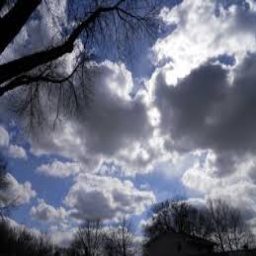

In [7]:
#looking at images
path1 = '/content/gdrive/My Drive/Weather classification/cloudy144.jpg'
img1 = cv2.imread(path1,1)
img1 = cv2.resize(img1, (256,256))
print(img1.shape) 
cv2_imshow(img1)


Now we will make X and y matrix together,This is one way on making X.

In [8]:
cloudy = 0
rain = 1
shine = 2
sunrise = 3
Y = []
size_we_want = (3,256,256)
Path= '/content/gdrive/My Drive/Weather classification'
X = np.empty((len(dirs),256,256,3),float)


for i in tqdm(range(len(dirs))):
  img = cv2.imread(Path+'/'+dirs[i],1)
  img = cv2.resize(img,(256,256))
  X[i] = img
  if "cloudy" in dirs[i]:
    Y.append(0)
  elif "rain" in dirs[i]:
    Y.append(1)
  elif "shine" in dirs[i]:
    Y.append(2)
  elif "sunrise" in dirs[i]:
    Y.append(3)

     
y = to_categorical(Y, num_classes=4)
# print(y)
# print(X)
# print(y.shape)
print(X.shape) 


(1122, 256, 256, 3)


In [9]:
X = np.transpose(X, (0,3,1,2))
X.shape

(1122, 3, 256, 256)

In [10]:
#Code to take X,y,i(i is no. of image) as input and give as output an image and label.
def check(X,y,i):
  print (y[i])
  img = np.transpose(X[i],(1,2,0))
  cv2_imshow(img)


[1. 0. 0. 0.]


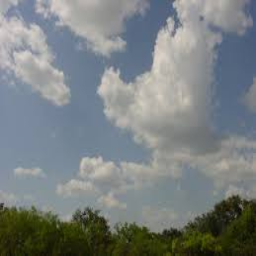

In [11]:
check(X,y,190)

Now we will make X  using concatenation. this is one more method to make X and y matrices

In [12]:
Path= '/content/gdrive/My Drive/Weather classification'
Y = []

for i in tqdm(range(len(dirs))):
  img = cv2.imread(Path+'/'+dirs[i] )
  img = cv2.resize(img,(256,256))
  img = np.transpose(img, (2,0,1))
  img = np.reshape(img, (1,3,256,256))
  if i == 0:
    X = img
  elif i>0:
     X = np.concatenate((X,img),axis = 0)


  if "cloudy" in dirs[i]:
    Y.append(0)
  elif "rain" in dirs[i]:
    Y.append(1)
  elif "shine" in dirs[i]:
    Y.append(2)
  elif "sunrise" in dirs[i]:
    Y.append(3)

     
y = to_categorical(Y, num_classes=4)
print(y.shape)
print(X.shape) 


(1122, 4)
(1122, 3, 256, 256)


In [13]:
#saving X and y matrices, so can use again without doing above processing
path2save = '/content/gdrive/My Drive/save_npy_files/'
np.save(path2save+'Weather_data.npy', X )
np.save(path2save+'Weather_data_label.npy', y )

Start Building Model

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,test_size=0.2,shuffle = True)

In [15]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)


(897, 3, 256, 256)
(225, 3, 256, 256)
(897, 4)
(225, 4)


In [16]:
#need to change shape, because sequential API doesn't support channels first
train_X= np.transpose(train_X,(0,2,3,1))
test_X= np.transpose(test_X,(0,2,3,1))

Sequential API Model

In [17]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x = train_X, y=train_y, batch_size=50, epochs=5, verbose=2, validation_split = 0.0, shuffle = True)


Epoch 1/5
18/18 - 17s - loss: 164.4666 - accuracy: 0.3010
Epoch 2/5
18/18 - 14s - loss: 1.2459 - accuracy: 0.4158
Epoch 3/5
18/18 - 14s - loss: 1.6337 - accuracy: 0.4872
Epoch 4/5
18/18 - 14s - loss: 12.8755 - accuracy: 0.4326
Epoch 5/5
18/18 - 14s - loss: 1.1788 - accuracy: 0.4459


Functional API Model

In [44]:
keras.backend.set_image_data_format('channels_first')

def VGG16(width, height, depth, classes,weightsPath=None):
  inputs = Keras.Input((depth,width, height))

  k = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(inputs)
  k = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = MaxPool2D(pool_size=(2,2))(k)

  k = Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = MaxPool2D(pool_size=(2,2),strides=(2,2))(k)

  k = Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = MaxPool2D(pool_size=(2,2),strides=(2,2))(k)

  k = Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(k)
  k = MaxPool2D(pool_size=(2,2),strides=(2,2))(k)

  k = Dense(4096, activation="relu")(k)
  k = Dense(4096, activation="relu")(k)


  output = Dense(4, activation="softmax")(k)